<a href="https://colab.research.google.com/github/aanyaidk-bit/Algorithmic_Trading_Project/blob/main/stock_strategy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Analyzing GOOGL ===
Cumulative Return: 141.94%
Annualized Return: 14.27%
Annualized Volatility: 21.92%
Sharpe Ratio: 0.65
Max Drawdown: -38.12%


/tmp/ipython-input-2248850832.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)


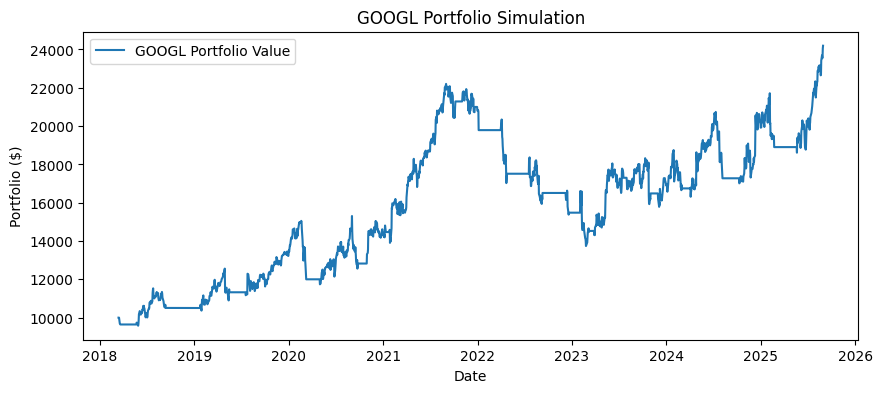


=== Analyzing AAPL ===
Cumulative Return: 201.39%
Annualized Return: 17.05%
Annualized Volatility: 21.19%
Sharpe Ratio: 0.80
Max Drawdown: -29.09%


/tmp/ipython-input-2248850832.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)


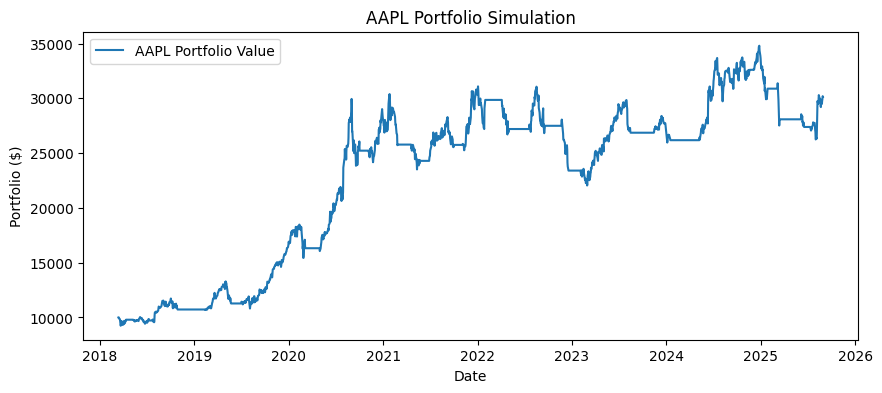


=== Analyzing TSLA ===
Cumulative Return: 423.41%
Annualized Return: 33.35%
Annualized Volatility: 47.20%
Sharpe Ratio: 0.71
Max Drawdown: -60.63%


/tmp/ipython-input-2248850832.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)


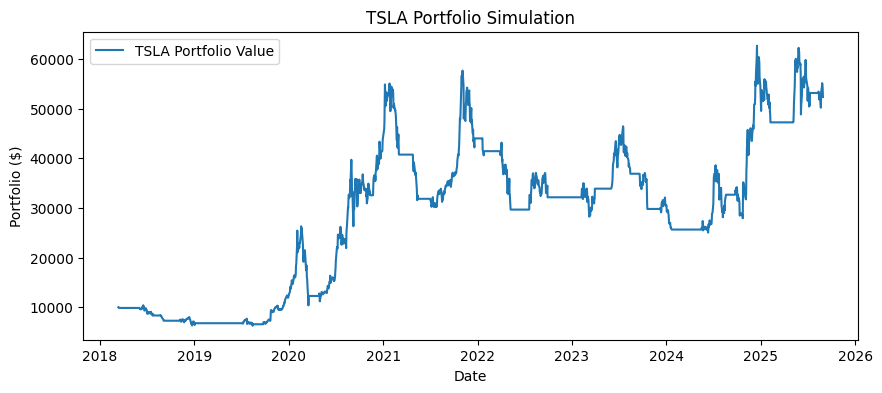

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')


#This is a trading strategy (MA20 > Ma50 = LONG)
#on a list of specified stocks, it calcutlates core performance metrics
#and visualizes the equaity curve for each stock.

# ---- Parameters ----
stocks = ["GOOGL", "AAPL", "TSLA"]
start = "2018-01-01"
end = "2025-09-01"
initial_cash = 10000

# ---- Loop through each stock ----
for ticker in stocks:
    print(f"\n=== Analyzing {ticker} ===")

    # ---- Download data----
    df = yf.download(ticker, start=start, end=end, progress=False)
    df = df[['Close']].rename(columns={'Close':'adj_close'})
    df.dropna(inplace=True)

    # ---- Moving averages ----
    df['MA20'] = df['adj_close'].rolling(window=20).mean()
    df['MA50'] = df['adj_close'].rolling(window=50).mean()
    df.dropna(inplace=True)

    # ---- Signals ----
    df['signal'] = 0
    df.loc[df['MA20'] > df['MA50'], 'signal'] = 1
    df['position'] = df['signal'].shift(1).fillna(0)

    # ---- Portfolio simulation ----
    df['returns'] = df['adj_close'].pct_change().fillna(0)
    df['strategy_returns'] = df['returns'] * df['position']
    df['portfolio_value'] = initial_cash * (1 + df['strategy_returns']).cumprod()

    # ---- Performance metrics ----
    cumulative_return = df['portfolio_value'].iloc[-1] / initial_cash - 1
    annual_return = df['strategy_returns'].mean() * 252
    annual_vol = df['strategy_returns'].std() * np.sqrt(252)
    sharpe = annual_return / (annual_vol + 1e-9)
    df['drawdown'] = df['portfolio_value'] / df['portfolio_value'].cummax() - 1
    max_drawdown = df['drawdown'].min()

    print(f"Cumulative Return: {cumulative_return:.2%}")
    print(f"Annualized Return: {annual_return:.2%}")
    print(f"Annualized Volatility: {annual_vol:.2%}")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2%}")

    # ---- Plot portfolio ----
    plt.figure(figsize=(10,4))
    plt.plot(df['portfolio_value'], label=f'{ticker} Portfolio Value')
    plt.title(f'{ticker} Portfolio Simulation')
    plt.xlabel('Date')
    plt.ylabel('Portfolio ($)')
    plt.legend()
    plt.show()